In [47]:
# Basic AiiDA database analysis notebook

# feel free to contribute, adapted and share.
__contributors__ = "Jens Broeder, Gregor Michalicek, Giovanni Pizzi"

# Goal: make it nice and shiny that if the hide_code extension is used all results can be exported
# as a very nice pdf. (https://github.com/kirbs-/hide_code)
print '\033[1m' + 'Basic analysis of the current AiiDA database:' + '\033[1m'

Basic analysis of the current AiiDA database:


In [48]:
from aiida import load_dbenv, is_dbenv_loaded
if not is_dbenv_loaded():
    load_dbenv()

from aiida.orm.querybuilder import QueryBuilder as QB
from aiida.orm import Node, User, DataFactory, Calculation, Computer, Code

from collections import Counter
from aiida.common.constants import elements as PeriodicTableElements
import time



In [67]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
# general plot properties:
figuresize=(18, 4)

In [51]:
# size of the db on disc might be nice to know.
# One could check in postgres. is there an other way?

In [63]:
# query for all nodes
print 'Information on nodes in the DB: \n'
q = QB()
q.append(Node, project=['id', 'ctime', 'mtime', 'type'], tag='node')
q.append(User, creator_of='node', project='email')
#q.limit(100)
t = time.time()
res = q.all()
elapsed = time.time() - t
totalnodes = len(res)
print "Total number of nodes in the database: {} (retrieved in {} s.)".format(totalnodes, elapsed)


Information on nodes in the DB: 

Total number of nodes in the database: 19427 (retrieved in 0.980753898621 s.)


In [53]:
users = Counter([r[4] for r in res])
print "Users:"
for count, email in sorted((v, k) for k, v in users.iteritems())[::-1]:
    print "* {} created {} nodes".format(email, count)

Users:
* j.broeder@fz-juelich.de created 19427 nodes


In [54]:
types = Counter([r[3] for r in res])
print "Node types:"

for count, typestring in sorted((v, k) for k, v in types.iteritems())[::-1]:
    print "* {}: {} nodes".format(typestring, count)

Node types:
* data.remote.RemoteData.: 4729 nodes
* data.folder.FolderData.: 4724 nodes
* calculation.job.fleur_inp.fleurinputgen.FleurinputgenCalculation.: 4535 nodes
* data.fleurinp.FleurinpData.: 3727 nodes
* data.structure.StructureData.: 762 nodes
* data.parameter.ParameterData.: 572 nodes
* calculation.job.fleur_inp.fleur.FleurCalculation.: 219 nodes
* calculation.process.ProcessCalculation.: 148 nodes
* code.Code.: 10 nodes
* data.singlefile.SinglefileData.: 1 nodes


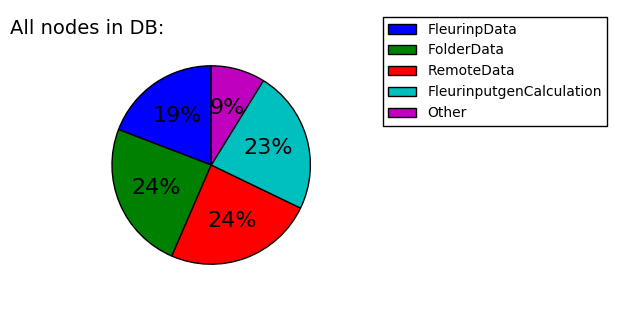

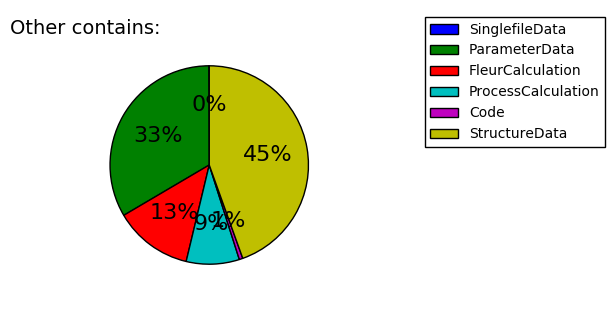

In [55]:
# plot piecharts of nodes:

# The slices will be ordered and plotted counter-clockwise.
labelst = [label.split('.')[-2] for label in types.keys()]
sizest = [nnodes for nnodes in types.values()]
# sizes smaller then x% (x=7) should be ploted together as other 
other = 0
labels_other, sizes_other, sizes = [], [], []
labels = []
other_plot = False
for i, size in enumerate(sizest):
    if size <= totalnodes*7./100.:
        other = other + size
        other_plot = True
        labels_other.append(labelst[i])
        sizes_other.append(size)
    else:
        sizes.append(size)
        labels.append(labelst[i])
if other_plot:
    labels.append('Other')
    sizes.append(other)

    # TODO better color scheme
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#colorsC = ['yellowgreen', 'gold', 'lightcoral']

fig = plt.figure()
ax1 = fig.gca()

sizesA = sizes
ax1.text(1.0, 1.1, 'All nodes in DB:', ha='center', va='center', fontsize=14)
patches, texts, autotexts = plt.pie(sizesA, #colors=colors,
       autopct='%1.0f%%', shadow=False, startangle=90,
       radius=0.8, center=(2.0, 0), frame=False)

for t in autotexts:
    t.set_size(16)
leg1 = plt.legend(labels, bbox_to_anchor=(1.8, 1), ncol=1, fontsize=10)
#plt.legend(labels, loc="best", ncol=2, fontsize=14)

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax1.set_aspect('equal')

fig2 = plt.figure()
ax2 = fig2.gca()

ax2.text(1.0, 1.1,'Other contains:', ha='center', va='center', fontsize=14)
patches, texts, autotexts = plt.pie(sizes_other, #colors=colors,
       autopct='%1.0f%%', shadow=False, startangle=90,
       radius=0.8, center=(2.0, 0), frame=False)

for t in autotexts:
    t.set_size(16)
#leg2 = plt.legend(labels_other, loc="right", ncol=1, fontsize=14)
leg2 = plt.legend(labels_other, bbox_to_anchor=(1.8, 1), ncol=1, fontsize=10)

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax2.set_aspect('equal')

#plt.rcParams['font.size'] = 20.0
#plt.rcParams['text.fontsize'] = 20
#plt.show()

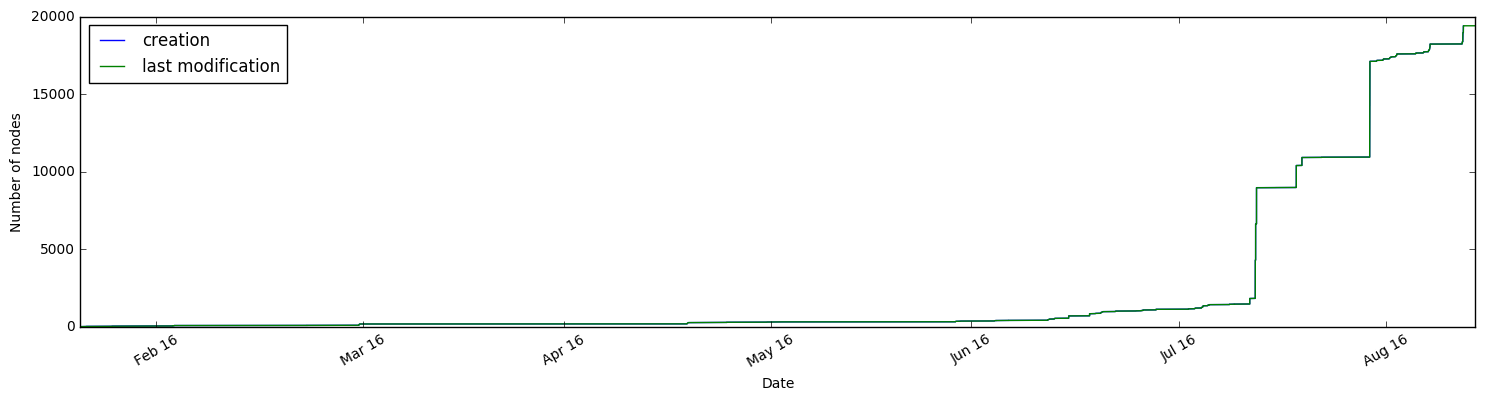

In [56]:
# Histogram by ctime & mtime
ctimes = sorted(r[1] for r in res)
mtimes = sorted(r[2] for r in res)
num_nodes_integrated = range(len(ctimes))
fig, ax = subplots(figsize=figuresize)
plot(ctimes, num_nodes_integrated, label='creation')
plot(mtimes, num_nodes_integrated, label='last modification')
ax.xaxis.set_major_formatter(DateFormatter("%b %y"))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30)
xlabel("Date")
ylabel("Number of nodes")
legend(loc='best')

In [64]:
# more detailed analysis of Codes
print 'Codes in the Database:'

q = QB()
q.append(Code)
codes = q.all()
print '\nThe following Codes were found in the database: \n'
for code in codes:
    print '\n' + code[0].full_text_info

#



Codes in the Database:

The following Codes were found in the database: 


 * PK:             19125
 * UUID:           938427a7-6a04-4a7d-b90d-d5b4603e8f36
 * Label:          fleur_inpgen_09_16
 * Description:    
 * Default plugin: fleur_inp.fleurinputgen
 * Used by:        71 calculations
 * Type:           local
 * Exec name:      ./fleur_inpgen_mac
 * List of files/folders:
   * [file] b_fleur_inpgen_mac
   * [file] fleur_inpgen_mac
 * prepend text:
   source ~/.profile_aiida
 * append text:
   # No append text.

 * PK:             17285
 * UUID:           abf68cd0-fdde-4dfb-9123-5e22b72818c5
 * Label:          fleur_v0.27
 * Description:    
 * Default plugin: fleur_inp.fleur
 * Used by:        156 calculations
 * Type:           remote
 * Remote machine: iff003
 * Remote absolute path: 
   /usr/users/iff_th1/broeder/codes/fleur_git_v2_7/iff003/fleur_iff003
 * prepend text:
   # No prepend text.
 * append text:
   # No append text.

 * PK:             15679
 * UUID:           f0

In [65]:
# on what computer were they run?
print 'Computers in the Database:'

q = QB()
q.append(Computer)
comps = q.all()
print '\nThe following Computers were found in the database: \n'
for computer in comps:
    print '\n' + computer[0].full_text_info



Computers in the Database:

The following Computers were found in the database: 


Computer name:     iff003
 * PK:             1
 * UUID:           e5f2ab1d-2f90-41a4-b085-6ed87f31fa86
 * Description:    PGI iff003 cluster Intel Xeon 2.93 GHz 24 GB, 12 cores per node
 * Hostname:       iff003
 * Enabled:        True
 * Transport type: ssh
 * Scheduler type: torque
 * Work directory: /scratch/{username}/aiida_run/
 * mpirun command: mpirun -np {tot_num_mpiprocs}
 * Used by:        254 nodes
 * prepend text:
   # No prepend text.
 * append text:
   # No append text.

Computer name:     local_mac
 * PK:             2
 * UUID:           ca2ae594-33bc-482e-a793-b7db0bc49cf6
 * Description:    your local mac (my macbook pro)
 * Hostname:       localhost
 * Enabled:        True
 * Transport type: local
 * Scheduler type: direct
 * Work directory: /scratch/{username}/aiida_run/
 * mpirun command: mpirun -np {tot_num_mpiprocs}
 * Used by:        9231 nodes
 * prepend text:
   # No prepend te

In [59]:
# more detailed analysis of Structures
print 'More detailed analysis of Structures \n '
# TODO currently this is very slow....
# maybe say how many distinged formulae are in the db.
# or realy distinged structures, braivais M different and not connected to other structures.

StructureData = DataFactory('structure')

t = time.time()
structures1 = StructureData.query() # this is a lot faster then with qb? # because of django?
elapsed = time.time() - t
print "Total number of structures: {} (retrieved in {} s.)".format(len(structures1), elapsed)
t = time.time()
q = QB()
q.append(StructureData)#, project=['extras','pbc'])#,'id', 'sites'])
structures = q.all()  
elapsed = time.time() - t
print "Total number of structures: {} (retrieved in {} s.)".format(len(structures), elapsed)
t = time.time()
#what structures, elements
structure_list = []
element_list = [data['symbol'] for num, data in PeriodicTableElements.iteritems()]
# dont use a dict, we want to keep order of elements
element_count_list = [[element, 0] for element in element_list]
# { element : occurences, ...}
atom_count_dict = {} # { number of atoms1 : occurences, ...}
n_bulk, n_film, n_1d = 0, 0, 0
extra_count_dict = {} # { extra string : occurences, ...}

for structure in structures:
    formula = structure[0].get_formula()
    structure_list.append(formula)
    for i, element in enumerate(element_list):
        if element in formula:
            element_count_list[i][1] = element_count_list[i][1] + 1    
    #add number of atoms to atom_count_dict 
    # TODO more general case: sites is not enough
    natom = len(structure[0].sites)
    atom_count_dict[natom] = atom_count_dict.get(natom, 0) + 1
    
    # how many 1D 2D 3D:
    pbc = structure[0].pbc
    if False in pbc:
        # film or 1D
        count = 0
        for pb in pbc:
           if not pb:
               count = count + 1
        if count == 1:
            n_film = n_film + 1
        else:
            n_1d = n_1d + 1
    else:
        n_bulk = n_bulk +1
    
    # evaluate extras
    extras = structure[0].get_extras()
    for key, val in extras.iteritems():
        string = str(key) + ' : ' + str(val)
        extra_count_dict[string] = extra_count_dict.get(string, 0) + 1

print '\nNumber of structures: 3D : {} , 2D: {} and 1D: {}'.format(n_bulk, n_film, n_1d)

elapsed = time.time() - t
print "(needed {} s.!!!)".format(elapsed)
print "\nExtra keys occurences:"
for occ, extra in sorted((v, k) for k, v in extra_count_dict.iteritems())[::-1]:
    print " {} : {} ".format(occ, extra)
    # print only first 100?


 
 more detailed analysis of Structures 
 
Total number of structures: 762 (retrieved in 0.00238800048828 s.)
Total number of structures: 762 (retrieved in 0.115568876266 s.)

 Number of structures: 3D : 705 , 2D: 57 and 1D: 0
(needed 34.1483981609 s.!!!)

 Extra keys occurences:
 262 : specification : {'project': u'Fusion', 'test': u'read_cif_test', 'type': u'Fusion relevant'} 
 219 : project : delta 
 100 : specification : {'test': u'read_cif_test', 'project': u'Fusion', 'type': u'Fusion relevant'} 
 71 : type : simple bulk 
 57 : type : tungsten film 
 57 : project : master 
 56 : title : W, films, Jens master project 
 6 : title : Zn, hcp zinc, bulk, delta project 
 6 : name : W100_7l 
 6 : name : W100_5l 
 6 : name : W100_15l 
 6 : name : W100_11l 
 5 : title : Be, hcp beryllium, bulk, delta project 
 5 : name : W111_7l 
 5 : name : W111_5l 
 5 : name : W111_15l 
 5 : name : W111_11l 
 4 : title : B, boron tricl (APW+lo used for actual calculation), bulk, delta project 
 3 : titl

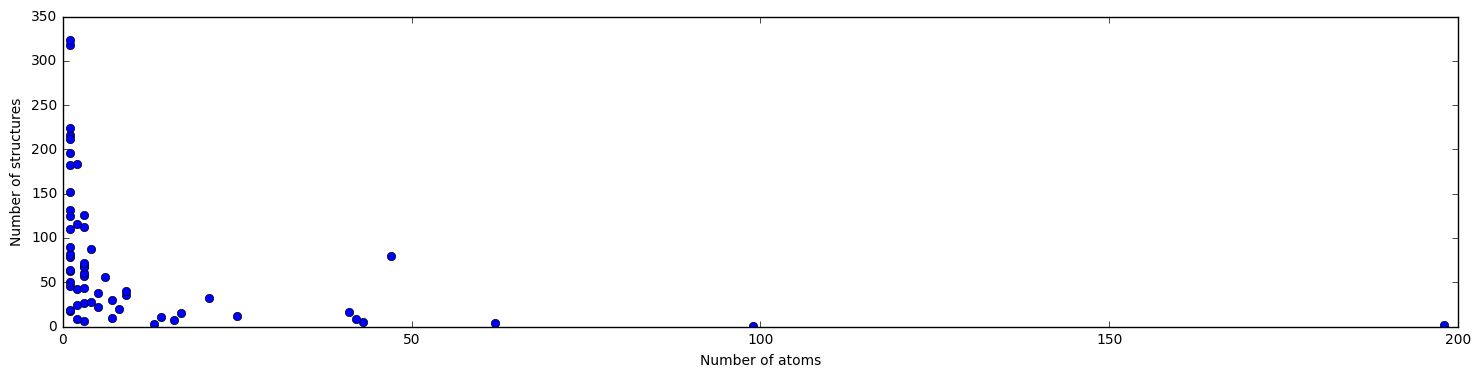

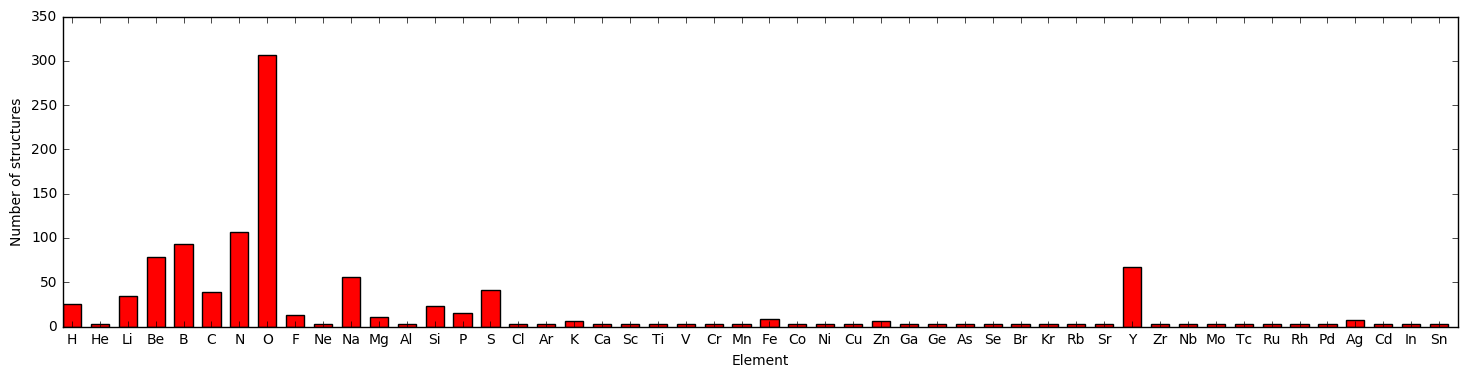

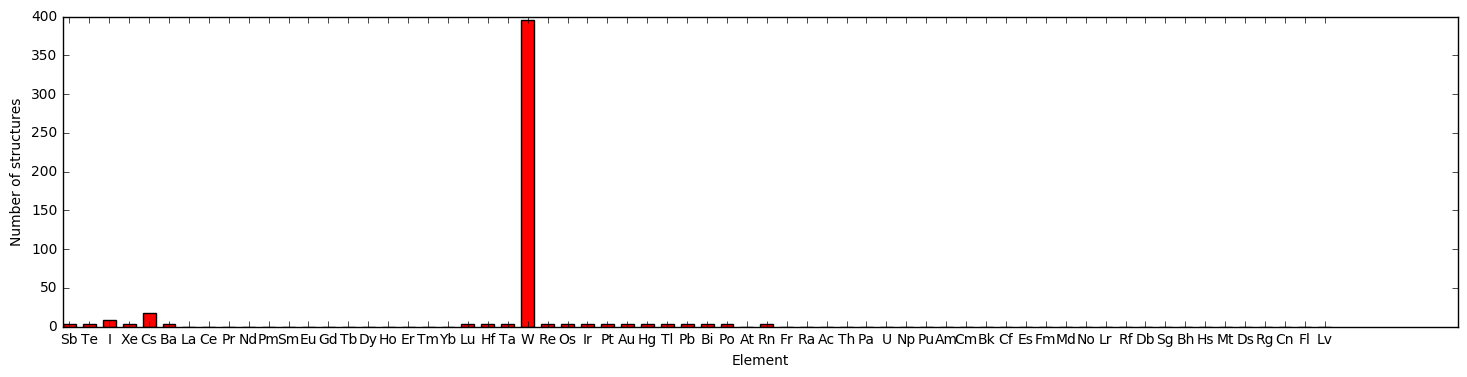

In [60]:
# plot structure analysis result

# plot number of atoms histogramm
fig = plt.figure(figsize=figuresize) #
x = [atom_count_dict[natom] for natom in atom_count_dict.keys()]
y = atom_count_dict.keys()
p1 = plot(x , y ,'bo')
xlabel("Number of atoms")
ylabel("Number of structures")

# plot periodic table barchart (histogramm like)
# splitted into 2 charts, otherwise x labels overlap.
fig = plt.figure(figsize=figuresize) #
N = len(element_count_list)
ind = np.arange(N)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

x = [e[0] for e in element_count_list]
y = [c[1] for c in element_count_list]
p2 = plt.bar(ind[:50], y[:50], width, color='r')
# TODO xticks size smaller
xticks(ind[:50] + width/2., x[:50])
xlabel("Element")
ylabel("Number of structures")
#p2.tick_params(axis='both', which='minor', labelsize=8)

fig = plt.figure(figsize=figuresize) #
p3 = plt.bar(ind[50:], y[50:], width, color='r')
#xt = get(gca, 'XTick')
#set(gca, 'FontSize', 10)
xticks(ind[50:] + width/2., x[50:])
xlabel("Element")
ylabel("Number of structures")

In [66]:
# more detail analysis of Calculations
print '\n\nMore detailed analysis of Calculations \n'


# TODO maybe sort per type
q = QB()
q.append(Calculation, project=['id', 'ctime', 'mtime', 'type', 'state'], tag='calcs1')
t = time.time()
calcs = q.all()
elapsed = time.time() - t
print "Total number of Calculation: {} (retrieved in {} s.)".format(len(calcs), elapsed)

states = Counter([r[4] for r in calcs])
print "Number of Calculation by current state:"
for count, state in sorted((v, k) for k, v in states.iteritems())[::-1]:
    print "{}  {}".format(count, state)

extra_count_dict = {} # { extra string : occurences, ...}
q = QB()
q.append(Calculation)#, project=['extras','pbc'])#,'id', 'sites'])
calcs = q.all() 

for calc in calcs:
    # evaluate extras
    extras = calc[0].get_extras()
    for key, val in extras.iteritems():
        string = str(key) + ' : ' + str(val)
        extra_count_dict[string] = extra_count_dict.get(string, 0) + 1

print "\nExtra keys occurences:"
for occ, extra in sorted((v, k) for k, v in extra_count_dict.iteritems())[::-1]:
    print " {} : {} ".format(occ, extra)
    # print only first 100?

# What type of calculations are there?

    
# computational time used
# I might what to know how long it would take to rerun things.
# or how, costly a database is





More detailed analysis of Calculations
Total number of Calculation: 4902 (retrieved in 0.289127826691 s.)
Number of Calculation by current state:
3755  FINISHED
891  FAILED
148  None
81  PARSINGFAILED
27  SUBMISSIONFAILED

Extra keys occurences:
 1 : projekt : test 


In [62]:
# more detail analysis of Connectiveness/proverance

# how may nodes are not 'connected at all' (no parents no children), 
# therefore not used and probably garbage?


# tree length and width histogram, of interest? how to travers an asyclic graph?

# what I have in mind here is: 
# is there only one type of calculations/ workflow in this db, or a lot
# of different ones? If every node is connected or has at least 
# certain generation depth exists, the db is probably from a(several) complete project(s).
# whereas if there are a lot of scattered nodes, there is either work in progress, 
# a lot of garbage, or even a bad designed plugin/AiiDA use which breaks provernace.


# If one even wants to test, if provernace is kept properly, 
# it might make sense to check if every jobcalculation can be tracked 
# back to a StructureData node

# harder problem might be:
# are there nodes which are exactly the same, doubled and so on?
# if yes one might want to create and run a 'reconnect tool'. I think this becomes important anyways when you merge
# databases